# Titanic Project
Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [479]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [480]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [481]:
df.shape

(891, 12)

In [482]:
# we can see above we have total we have total 12 colums and 891 rows available in data set

In [483]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [484]:
# cheking to 5 rows just to have normal understanding of data

In [485]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [486]:
# Similarly checking bottom 5 rows.

In [487]:
df.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
735,736,0,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.100,NaN,S
580,581,1,2,"Christy, Miss. Julie Rachel",female,25.0,1,1,237789,30.000,NaN,S
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.125,A10,C
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.000,NaN,S
355,356,0,3,"Vanden Steen, Mr. Leo Peter",male,28.0,0,0,345783,9.500,NaN,S
545,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.000,NaN,S


In [488]:
# Taking sample using sample code which will give us random six lines as we mentioned 6 sample

In [489]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [490]:
# Checking Null values and as we can see we have null value present in data set which we need to handle acrrodig to importance

In [491]:
Missing_percentage = df.isnull().sum().sort_values(ascending=False)/len(df)
Missing_percentage[:12]

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [492]:
# we are cheking how much % of data in missing with coulumn wise

In [493]:
df=df.drop(columns="Cabin",axis=1)

In [494]:
# above we can see approx 77% data missong in column "Cabin" so I decided to drop it completly

In [495]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [496]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [497]:
# I have imputed missing age with mean of age

In [498]:
# Cheching unique value present in Embarked so that we can make dicision about which imputing technique will work
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [499]:
# As we can see dtype is showing object hence we need to use mode imputing becasue mean and median would not work here

In [500]:
print(df["Embarked"].mode())

0    S
Name: Embarked, dtype: object


In [501]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [502]:
# Lets check now if all null values are imputied or not

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Finally we dont have any null value present in data sent now

In [503]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

As per above we can see that "name","sex","ticket","Embarked" These are the object which we need to handle using encoding

I have decided to drop Name column instead of Encoding it becasue Generally name does not decide if person will survived or not.

In [504]:
df=df.drop(columns="Name",axis=1)

Lets use Encoding technique for other objects

In [505]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


df['Sex']=encoder.fit_transform(df['Sex'])
df["Sex"].unique()


array([1, 0])

In [506]:
df['Embarked']=encoder.fit_transform(df['Embarked'])
df["Embarked"].unique()

array([2, 0, 1])

In [507]:
df['Ticket']=encoder.fit_transform(df['Ticket'])
df["Ticket"].unique()

array([523, 596, 669,  49, 472, 275,  85, 395, 344, 132, 616,  38, 535,
       333, 413, 153, 480, 151, 301, 184, 139, 152, 278,  42, 329, 179,
        95, 283, 362, 598, 586, 288, 549, 600,  43, 202, 514, 302, 186,
       507,  53, 391, 634, 282, 617, 462,  76, 190, 377, 249, 522, 587,
       239,  29,  94, 555, 215, 561, 566, 197,  32, 457, 337, 601, 189,
       553, 623, 248, 270, 557, 621, 204,  80, 347, 355, 473, 158, 432,
       304, 311, 280,  25, 637, 247, 676, 652, 297, 298, 341, 678, 548,
       428, 475, 607, 612, 117, 150, 384, 361, 417, 505, 245, 354, 296,
       254, 388, 469,   2, 193, 274, 491, 176, 666, 460, 585, 540, 219,
       463, 541, 196, 318, 380, 640, 537, 111, 552, 630,  55, 504, 592,
       203, 332, 668, 438, 118, 558, 405, 113, 147, 622,  36, 516, 538,
       573, 595, 418, 654, 258, 568, 470, 559, 323, 265, 423,  28, 576,
         5, 659,  90, 412, 488, 593, 169, 574, 629, 114, 271,  34, 459,
        11, 435, 386, 122, 227, 406, 604, 452, 494, 461, 160, 30

In [508]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.000000,1,0,523,7.2500,2
1,2,1,1,0,38.000000,1,0,596,71.2833,0
2,3,1,3,0,26.000000,0,0,669,7.9250,2
3,4,1,1,0,35.000000,1,0,49,53.1000,2
4,5,0,3,1,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,101,13.0000,2
887,888,1,1,0,19.000000,0,0,14,30.0000,2
888,889,0,3,0,29.699118,1,2,675,23.4500,2
889,890,1,1,1,26.000000,0,0,8,30.0000,0


As we can see above data is fully Encoded for object

In [509]:
df.memory_usage()

Index           132
PassengerId    7128
Survived       7128
Pclass         7128
Sex            3564
Age            7128
SibSp          7128
Parch          7128
Ticket         3564
Fare           7128
Embarked       3564
dtype: int64

We can see above how much memory is used by our dataframe in bytes

<Axes: xlabel='Survived'>

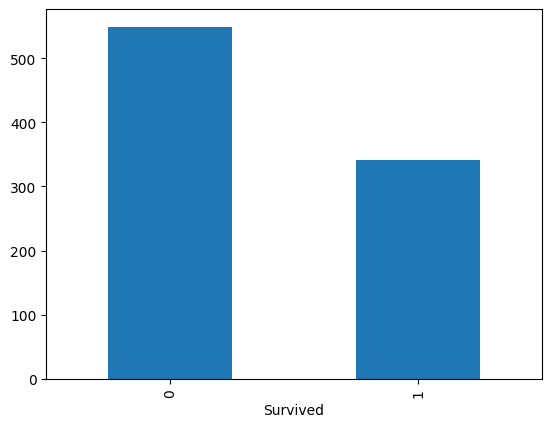

In [510]:
survived_count=df['Survived'].value_counts()

survived_count.plot(kind='bar')

We can see servived count(1) is less and not survived is high 

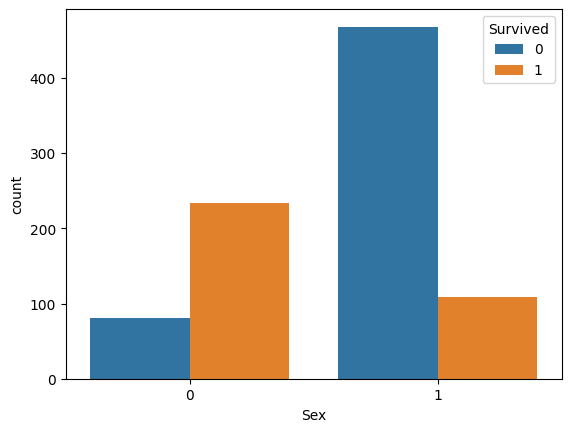

In [511]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.show()

We can see Female servives count as high and male in Low

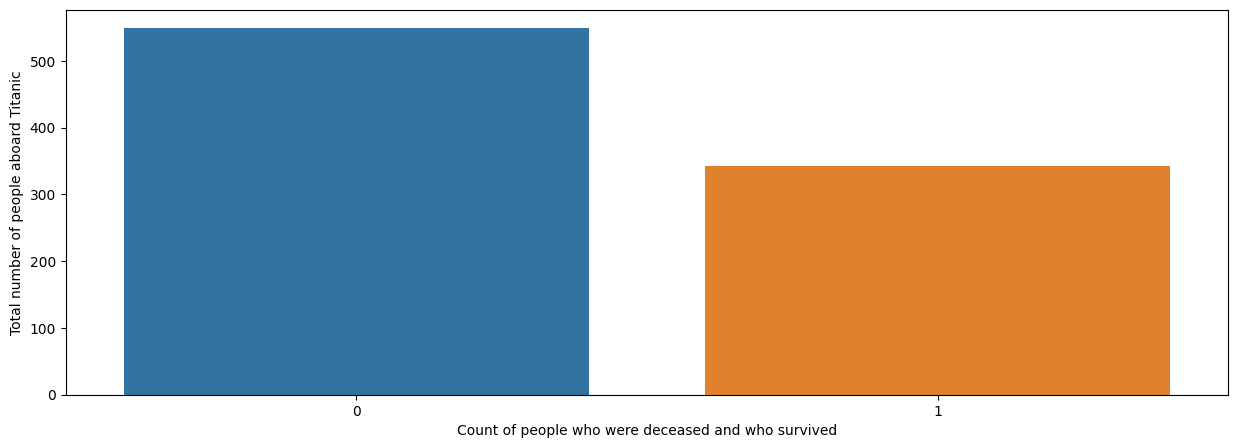

In [512]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Survived', data = df)
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

As we can see above 0 is the count of people who did not survived and 1 in showing us count of people who did not. that means count of survived peopole is less then who did not survived

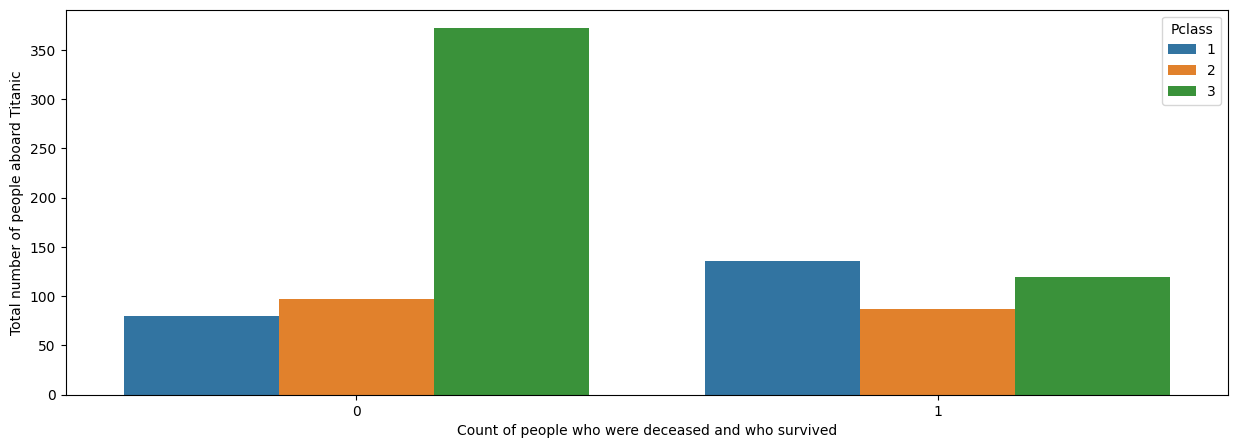

In [513]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Survived', data = df, hue='Pclass')
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

Again we can see Pclass 3 Females surbvived more than males in Pclass 3 that means prriority was given to females first.

# EDA

<Axes: xlabel='PassengerId', ylabel='Survived'>

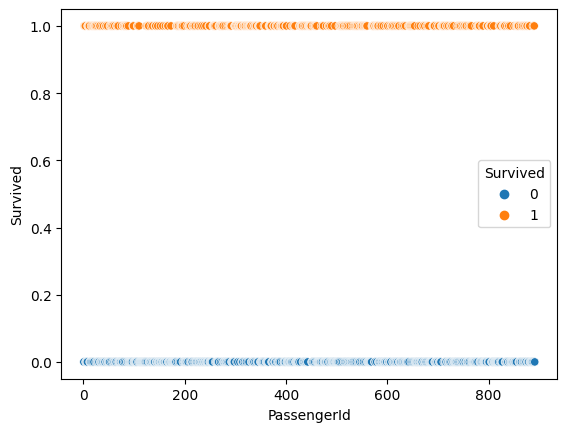

In [514]:

sns.scatterplot
sns.scatterplot(x="PassengerId",y="Survived",data=df,hue='Survived')

We can see above equality between Survived and PassangerID

<Axes: xlabel='Pclass', ylabel='Survived'>

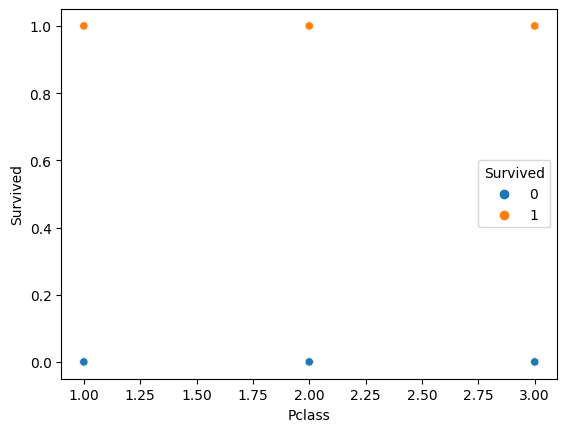

In [515]:
sns.scatterplot
sns.scatterplot(x="Pclass",y="Survived",data=df,hue='Survived')

<Axes: xlabel='Sex', ylabel='Survived'>

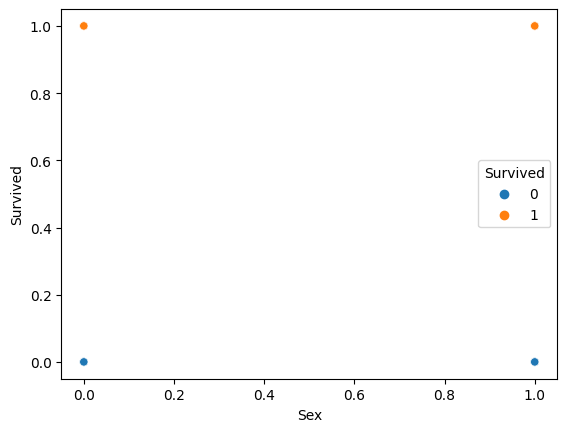

In [516]:
sns.scatterplot
sns.scatterplot(x="Sex",y="Survived",data=df,hue='Survived')

<Axes: xlabel='Age', ylabel='Survived'>

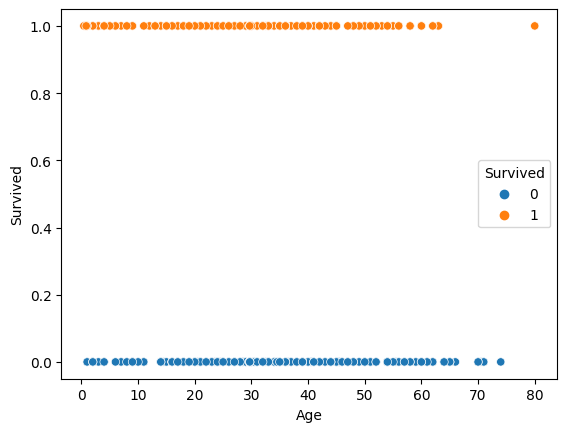

In [517]:
sns.scatterplot
sns.scatterplot(x="Age",y="Survived",data=df,hue='Survived')

In [518]:
# We can see that more the age then survival chnaces are slighllty slow

<Axes: xlabel='SibSp', ylabel='Survived'>

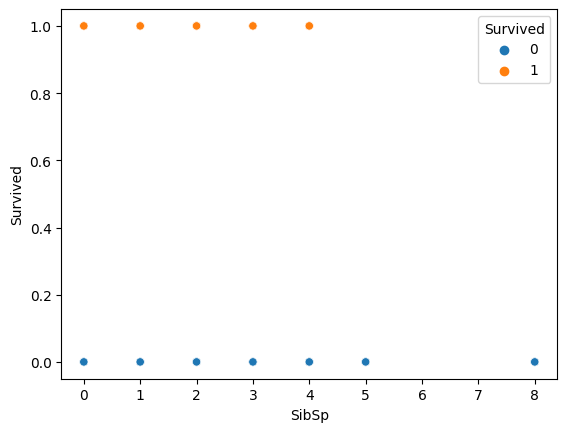

In [519]:
sns.scatterplot
sns.scatterplot(x="SibSp",y="Survived",data=df,hue='Survived')

<Axes: xlabel='Parch', ylabel='Survived'>

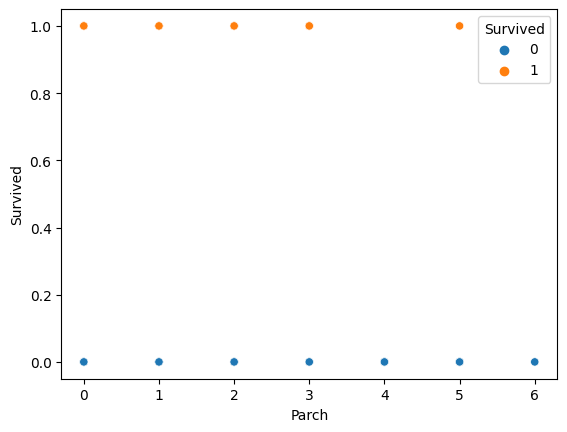

In [520]:
sns.scatterplot
sns.scatterplot(x="Parch",y="Survived",data=df,hue='Survived')

<Axes: xlabel='Fare', ylabel='Survived'>

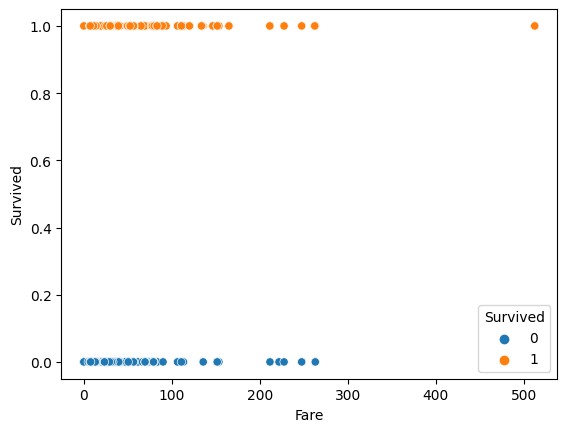

In [521]:
sns.scatterplot
sns.scatterplot(x="Fare",y="Survived",data=df,hue='Survived')

From all above chart I can observed that they are very smiliar to each other or else there in no any storng negative or positve relation

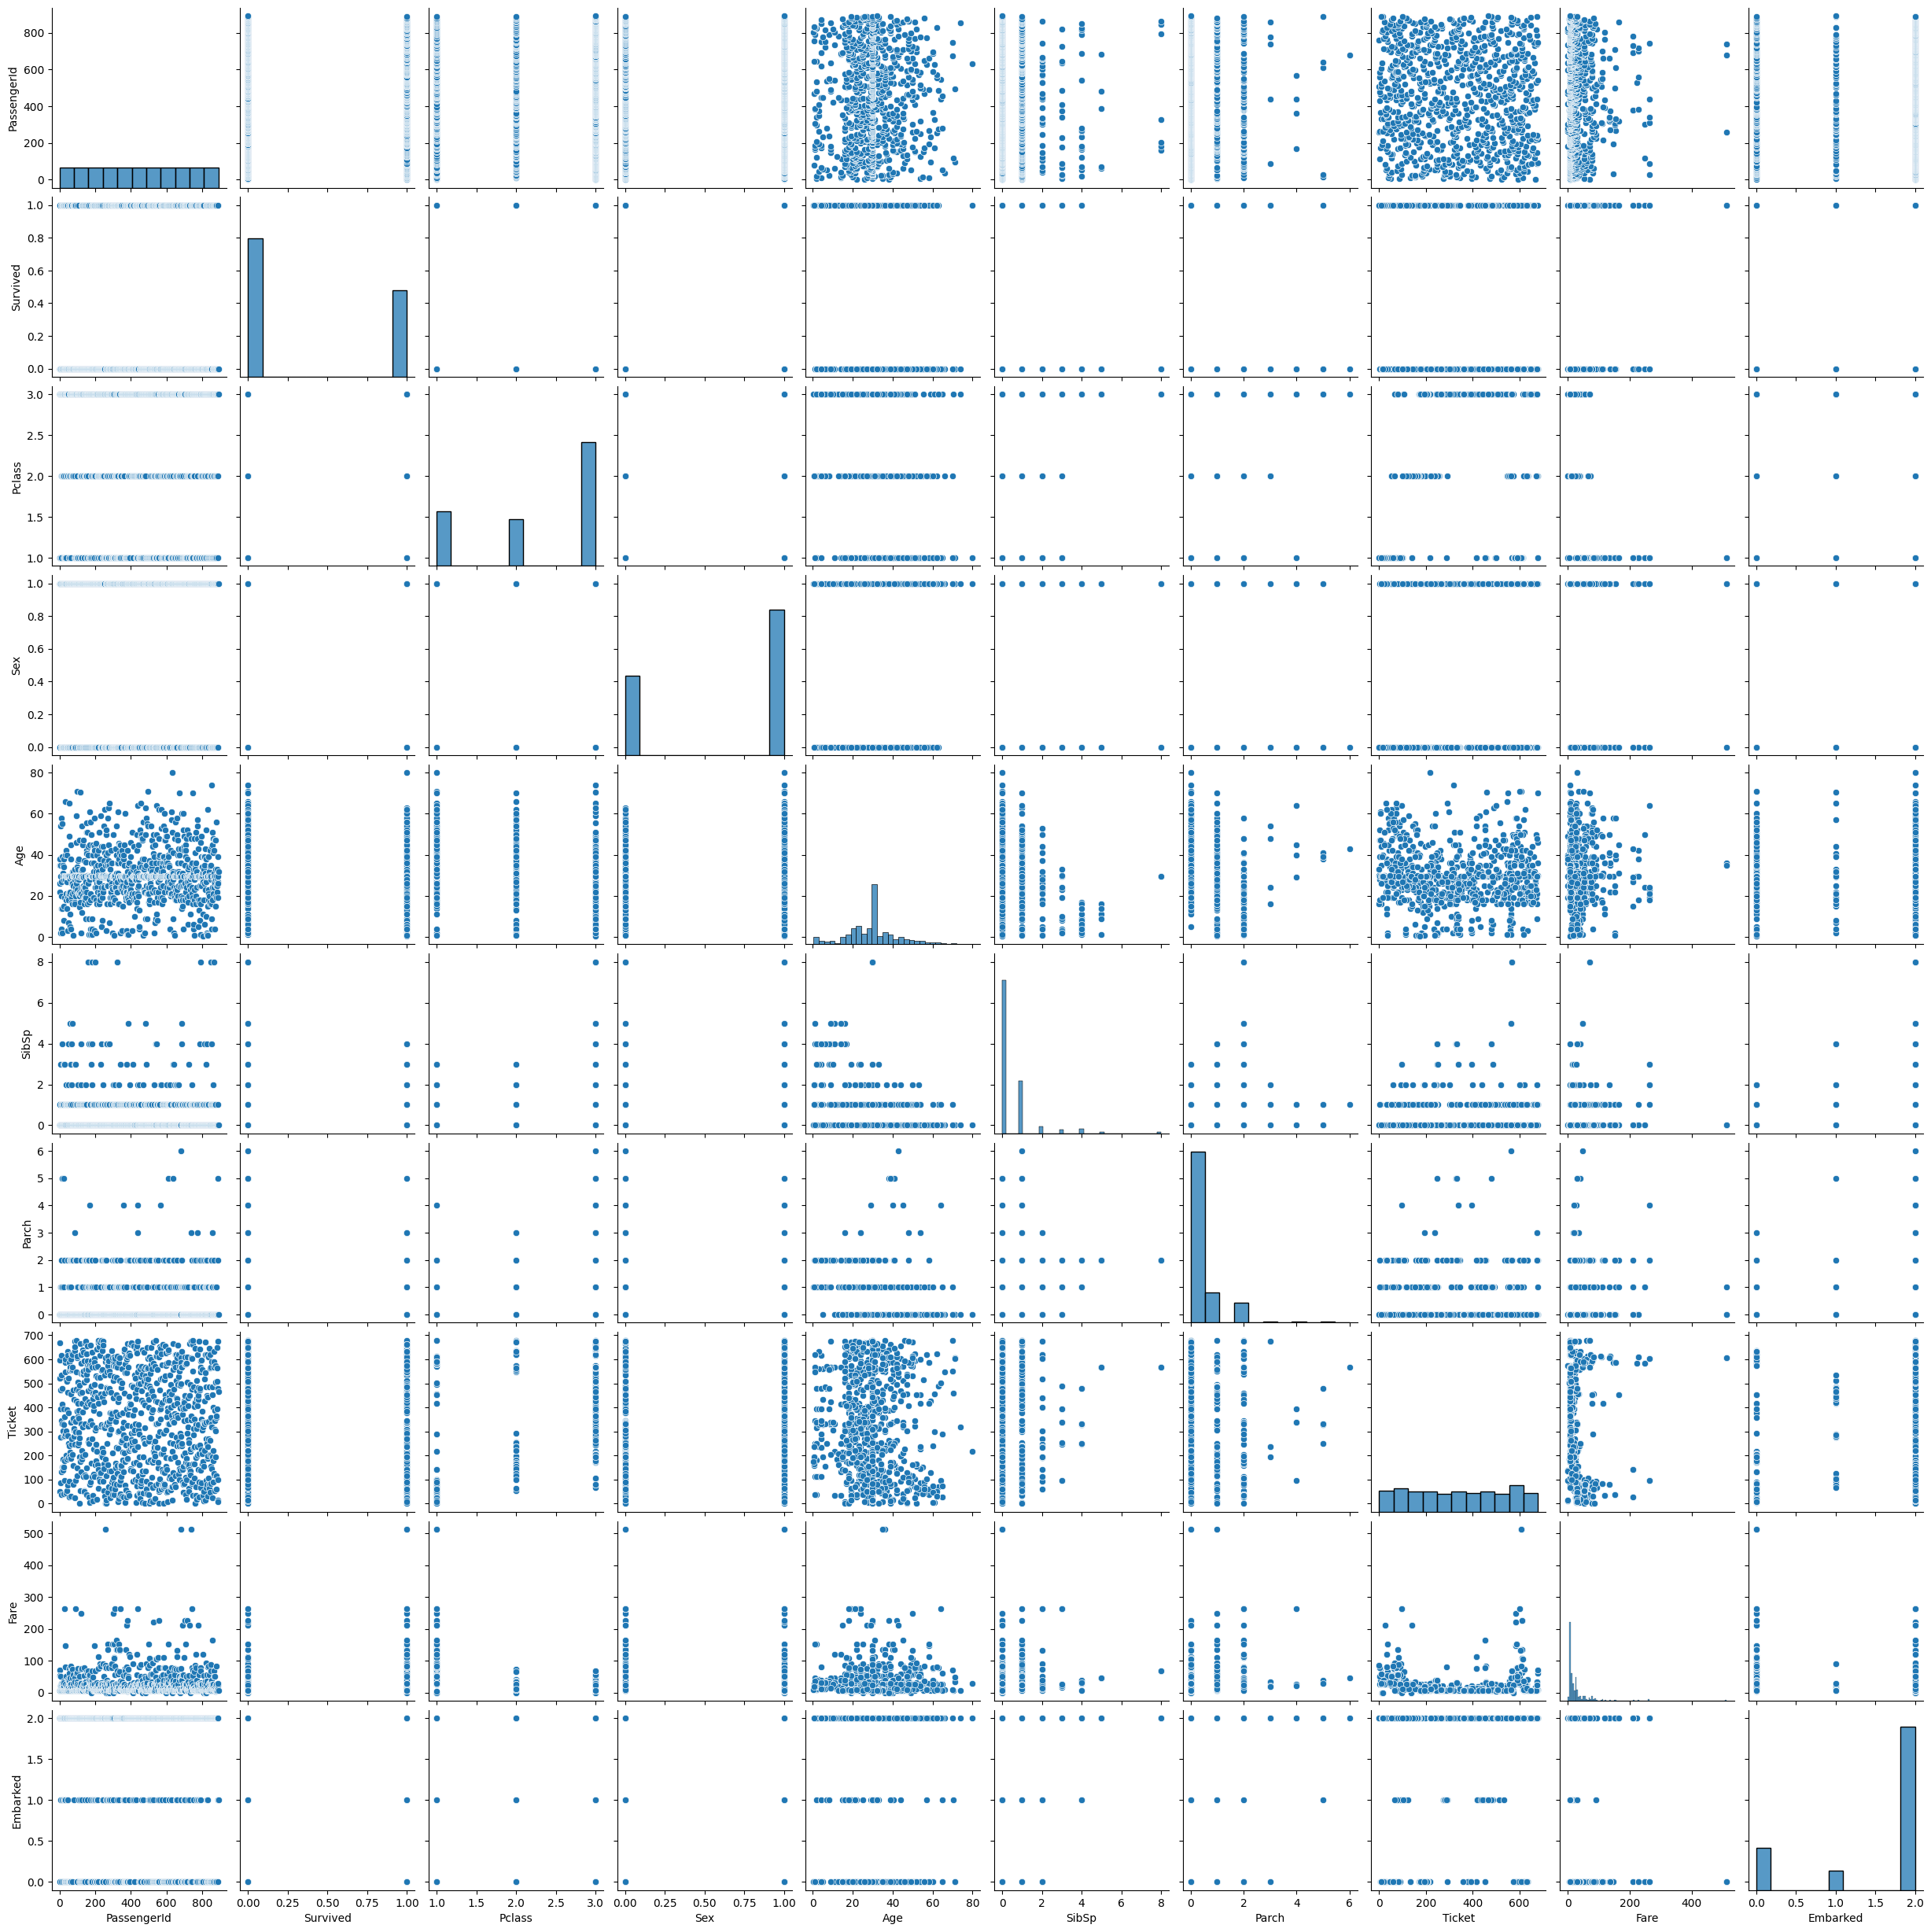

In [522]:
sns.pairplot(df)

Looking at above chart we can clearly see data is very messy and we need to work more on skewnees, outliers and all other technique to make data more feasible for ML models

In [523]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.000000,1,0,523,7.2500,2
1,2,1,1,0,38.000000,1,0,596,71.2833,0
2,3,1,3,0,26.000000,0,0,669,7.9250,2
3,4,1,1,0,35.000000,1,0,49,53.1000,2
4,5,0,3,1,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,101,13.0000,2
887,888,1,1,0,19.000000,0,0,14,30.0000,2
888,889,0,3,0,29.699118,1,2,675,23.4500,2
889,890,1,1,1,26.000000,0,0,8,30.0000,0


In [524]:
df = df.drop("Ticket", axis=1)

In [525]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


In between I found that Tickes has no any direct relation with survival predication hence I removed it as well

In [526]:
df = df.drop("PassengerId", axis=1)

In [527]:
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


Similary droping passengerID which we dont required at all

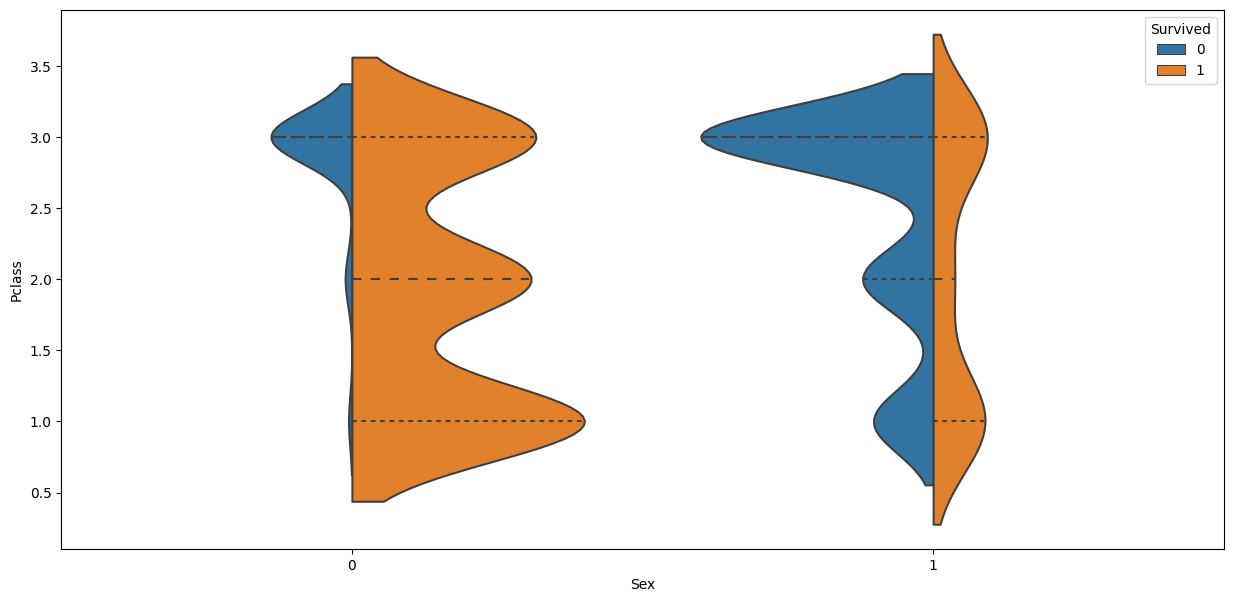

In [528]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Sex", y="Pclass", hue="Survived", data=df, split=True, scale="count", inner="quartile")
plt.show()

From above Violin plot we can notice two things Female servived count is high than male count and second thing is males are survived less than feamles in Pclass 3

In [529]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


In [530]:
# Lets use heatmap just to undersatnd better

<Axes: >

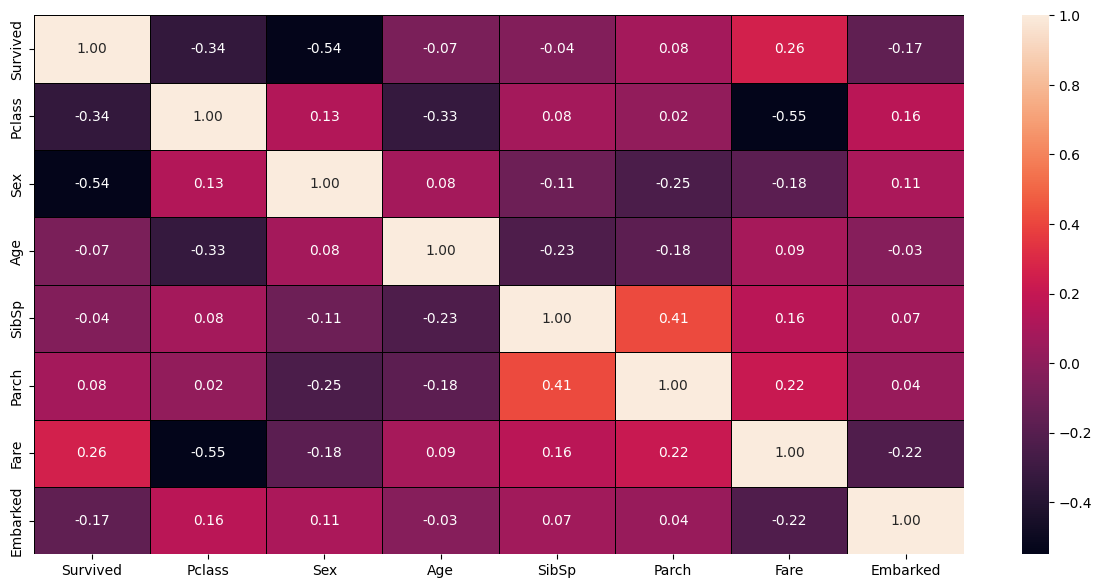

In [531]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.6,linecolor="black", fmt='.2f')

In [532]:
df.corr()['Survived'].sort_values()

Sex        -0.543351
Pclass     -0.338481
Embarked   -0.167675
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

I see that Sibsp and Parch are not contributing more in Survived numbers hence I would prefer to remove them just becaseu its better for our model insted of unneccesary contribution

In [533]:
df = df.drop(["SibSp","Parch"], axis=1)

In [534]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.000000,7.2500,2
1,1,1,0,38.000000,71.2833,0
2,1,3,0,26.000000,7.9250,2
3,1,1,0,35.000000,53.1000,2
4,0,3,1,35.000000,8.0500,2
...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,2
887,1,1,0,19.000000,30.0000,2
888,0,3,0,29.699118,23.4500,2
889,1,1,1,26.000000,30.0000,0


So finally I removed them. So basically our main goal is to keep oly those features which are really important and contributing towards our target varibale. And we should not ditract our main goa with any features

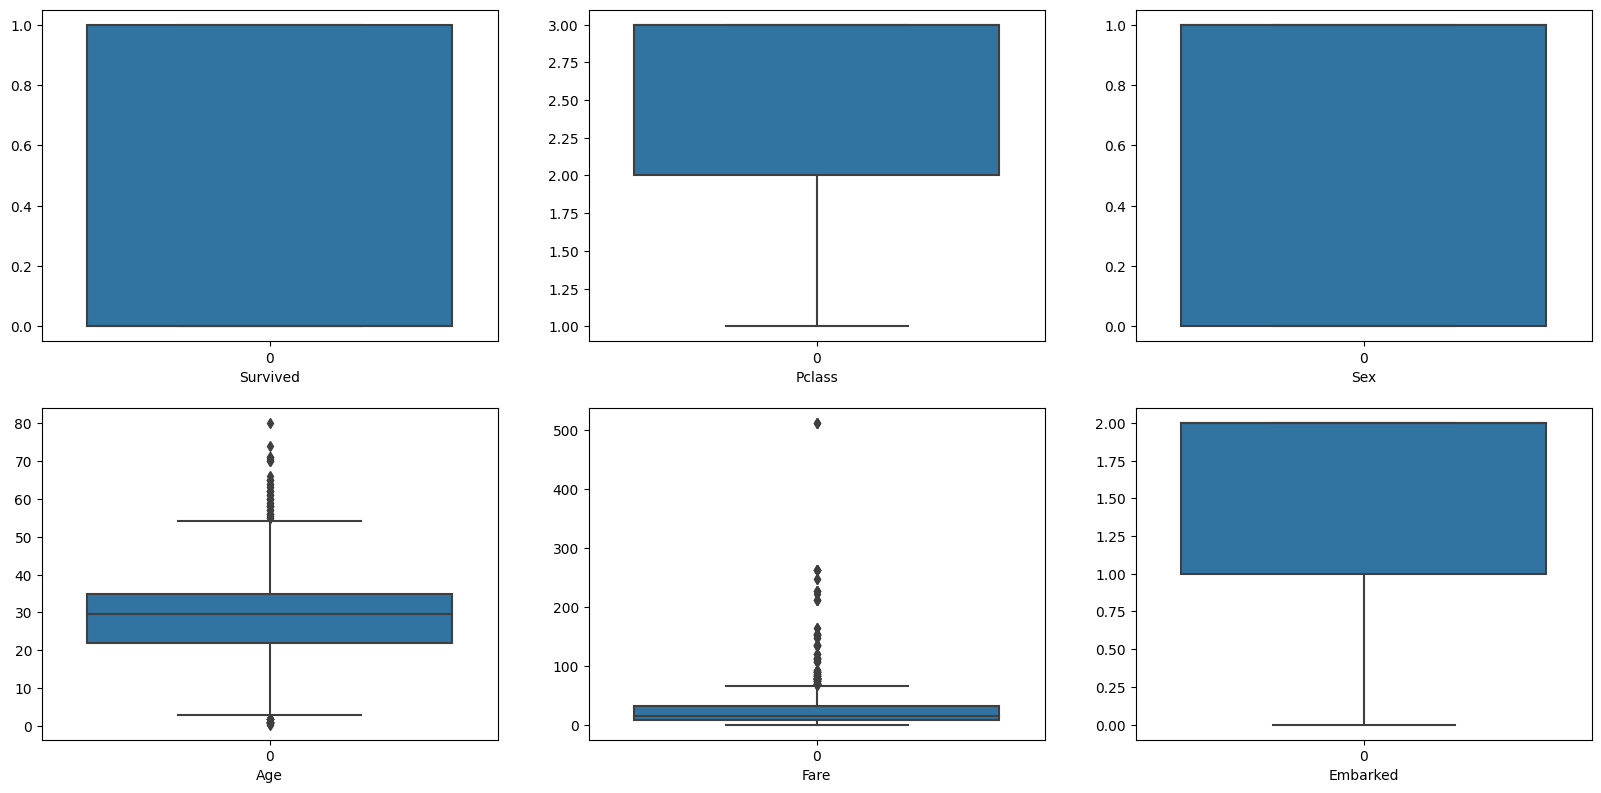

In [535]:
plt.figure(figsize=(20,25))
graph=1

for i in df:
    if graph<=6:
        plt.subplot(5,3,graph)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
    graph+=1
    
plt.show()   

In [536]:
# We have outliers present in fare and age which we can adjust. 

# Z score method to remove outliers

In [537]:
# taking 3 as threshold
from scipy.stats import zscore
zscore = zscore(df)
zabs = np.abs(zscore)

z = df[(zabs<3).all(axis=1)] 

In [538]:
z.shape

(864, 6)

In [539]:
df.shape

(891, 6)

In [540]:
loss = (891-864)/891*100
loss

3.0303030303030303

So we will have only 3 % Percent of data loss hence we will remove outliers

In [541]:
dropindex = df.index.difference(z.index)
dropindex

Index([ 27,  88,  96, 116, 118, 258, 299, 311, 341, 377, 380, 438, 493, 527,
       557, 630, 672, 679, 689, 700, 716, 730, 737, 742, 745, 779, 851],
      dtype='int64')

In [542]:
df.drop(dropindex,inplace = True)
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.000000,7.2500,2
1,1,1,0,38.000000,71.2833,0
2,1,3,0,26.000000,7.9250,2
3,1,1,0,35.000000,53.1000,2
4,0,3,1,35.000000,8.0500,2
...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,2
887,1,1,0,19.000000,30.0000,2
888,0,3,0,29.699118,23.4500,2
889,1,1,1,26.000000,30.0000,0


Survived       Axes(0.125,0.53;0.168478x0.35)
Pclass      Axes(0.327174,0.53;0.168478x0.35)
Sex         Axes(0.529348,0.53;0.168478x0.35)
Age         Axes(0.731522,0.53;0.168478x0.35)
Fare           Axes(0.125,0.11;0.168478x0.35)
Embarked    Axes(0.327174,0.11;0.168478x0.35)
dtype: object

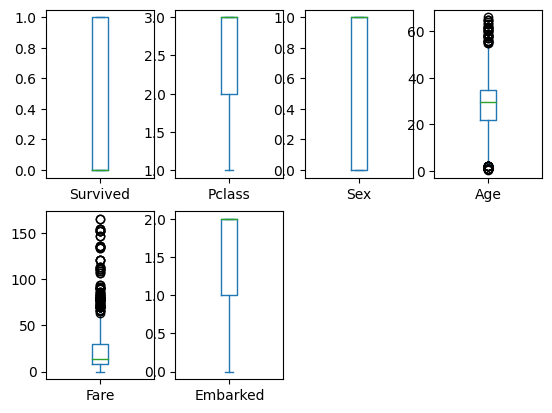

In [543]:
df.plot(kind='box',subplots=True,layout=(2,4))

Checking after removing outliers and We tried our best to remove outliers now we can go ahead.

In [544]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,864.0,0.378472,0.485287,0.00,0.0000,0.000000,1.000,1.0000
Pclass,864.0,2.343750,0.819028,1.00,2.0000,3.000000,3.000,3.0000
Sex,864.0,0.650463,0.477100,0.00,0.0000,1.000000,1.000,1.0000
Age,864.0,29.322935,12.490450,0.42,22.0000,29.699118,35.000,66.0000
Fare,864.0,26.500689,29.400192,0.00,7.8958,13.860400,29.775,164.8667
Embarked,864.0,1.555556,0.777235,0.00,1.0000,2.000000,2.000,2.0000


In [545]:
df.skew()

Survived    0.502011
Pclass     -0.708375
Sex        -0.632203
Age         0.239002
Fare        2.257178
Embarked   -1.328443
dtype: float64

Lets plot on distplot to see skewness visually

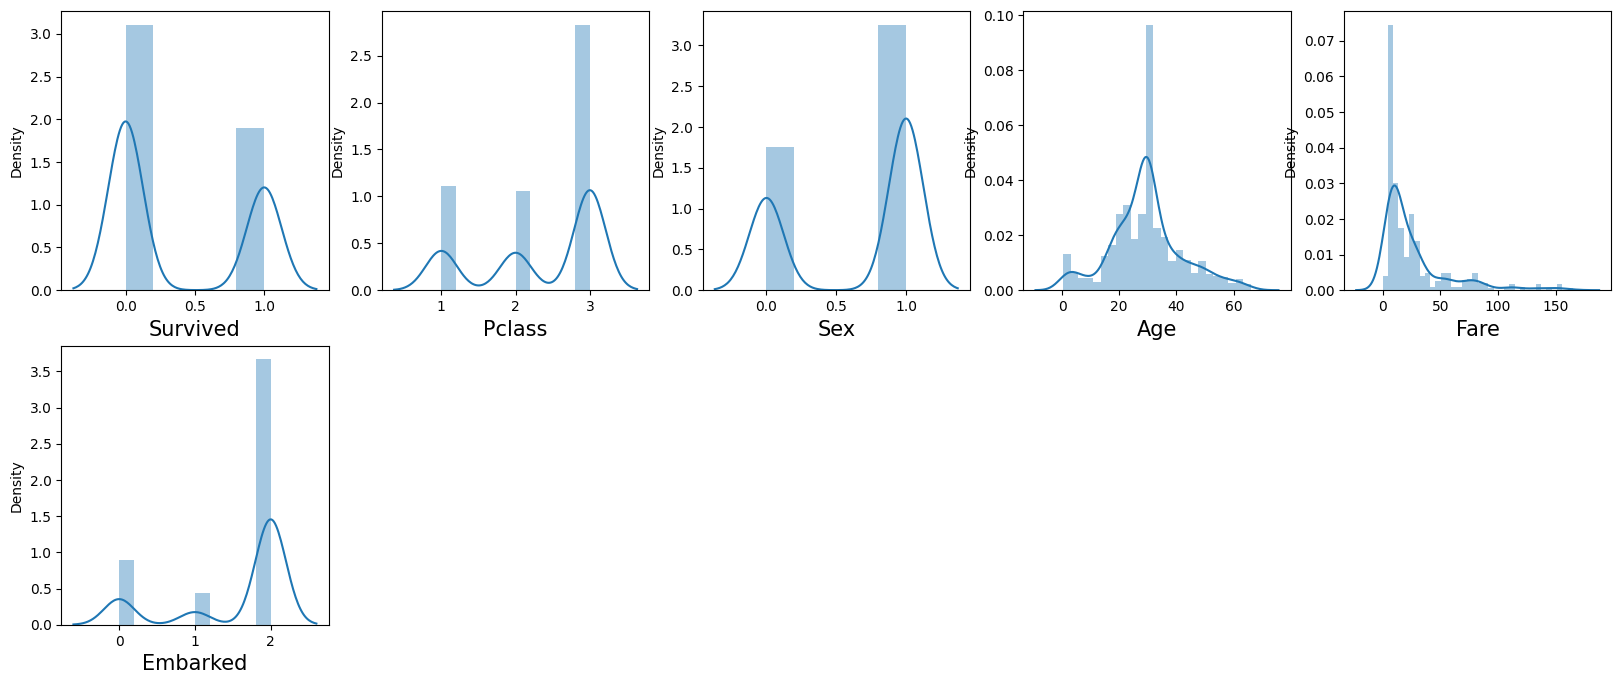

In [546]:
plt.figure(figsize=(20,21),facecolor='white')

plotn=1

for col in df:
    if plotn<=6:
        plt.subplot(5,5,plotn)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=15)
        
    plotn+=1   
    
plt.show()    
      

As we can see we have skewed data available in column Fare and Embarked

In [547]:
x = df.drop("Survived", axis=1)
y = df["Survived"]

In [548]:
x.shape


(864, 5)

In [549]:
y.shape

(864,)

Lets treat skewness now as have seen there was skewness present in data set

In [550]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.84270475,  0.7330529 , -0.56267593, -0.88276856,  0.59762641],
       [-1.50190324, -1.36415804,  0.70295816,  1.5290383 , -1.81681878],
       [ 0.84270475, -1.36415804, -0.23892784, -0.79244395,  0.59762641],
       ...,
       [ 0.84270475, -1.36415804,  0.05566474,  0.34527507,  0.59762641],
       [-1.50190324,  0.7330529 , -0.23892784,  0.60798116, -1.81681878],
       [ 0.84270475,  0.7330529 ,  0.23686358, -0.81516677, -1.30401385]])

In [551]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

In [552]:
Columnsname=['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']

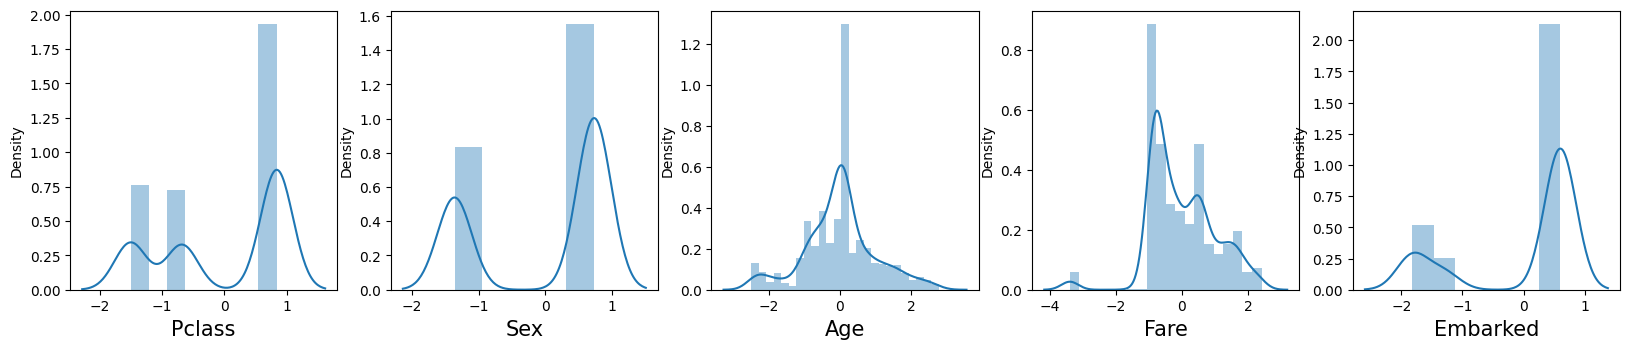

In [553]:
new_x=pd.DataFrame(data=x,columns=Columnsname)

plt.figure(figsize=(20,21),facecolor='white')

plotn=1

for col in new_x:
    if plotn<=6:
        plt.subplot(5,5,plotn)
        sns.distplot(new_x[col])
        plt.xlabel(col,fontsize=15)
        
    plotn+=1   
    
plt.show() 

In [554]:
# we have removed skewness level now

# Feature Scaling

In [555]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.84270475,  0.7330529 , -0.56267593, -0.88276856,  0.59762641],
       [-1.50190324, -1.36415804,  0.70295816,  1.5290383 , -1.81681878],
       [ 0.84270475, -1.36415804, -0.23892784, -0.79244395,  0.59762641],
       ...,
       [ 0.84270475, -1.36415804,  0.05566474,  0.34527507,  0.59762641],
       [-1.50190324,  0.7330529 , -0.23892784,  0.60798116, -1.81681878],
       [ 0.84270475,  0.7330529 ,  0.23686358, -0.81516677, -1.30401385]])

As we can observe that our data is scalled between -1 to 1 scall which will give us good result while we will train our module.

In [556]:
# we will find out now best random variable

In [557]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state=i)
    modRF = RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 0.861271676300578 on Random State: 87


As Above we can see highest accuracy we are getting at random state 76 then we will consider this on in training modules

In [558]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [559]:
LOGR = LogisticRegression(solver = 'liblinear')
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
SV = SVC()
KNN = KNeighborsClassifier()


model=[LOGR,RFC,DTC,SV,KNN]


for i in model:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=76)
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('performance matrix of',i,'is:')
    print("Confusion matrix :",confusion_matrix(y_test,predi))
    print("Classification report :", classification_report(y_test,predi,))
    print("Accuracy score :", accuracy_score(y_test,predi))
    print("*****************************************************************")

performance matrix of LogisticRegression(solver='liblinear') is:
Confusion matrix : [[90 12]
 [17 54]]
Classification report :               precision    recall  f1-score   support

           0       0.84      0.88      0.86       102
           1       0.82      0.76      0.79        71

    accuracy                           0.83       173
   macro avg       0.83      0.82      0.82       173
weighted avg       0.83      0.83      0.83       173

Accuracy score : 0.8323699421965318
*****************************************************************
performance matrix of RandomForestClassifier() is:
Confusion matrix : [[86 16]
 [16 55]]
Classification report :               precision    recall  f1-score   support

           0       0.84      0.84      0.84       102
           1       0.77      0.77      0.77        71

    accuracy                           0.82       173
   macro avg       0.81      0.81      0.81       173
weighted avg       0.82      0.82      0.82       173

Accu

In [560]:
from sklearn.model_selection import cross_val_score
j=[LOGR,RFC,DTC,SV,KNN]
for n in j:
  print('Cross_Validation_score of',n,'is')
  score=cross_val_score(n,x,y,cv=5)
  print(score)
  print(score.mean())
  print(score.std())
  print('\n')

Cross_Validation_score of LogisticRegression(solver='liblinear') is
[0.78612717 0.82080925 0.78612717 0.79768786 0.79069767]
0.7962898239010621
0.012969101700926203


Cross_Validation_score of RandomForestClassifier() is
[0.75722543 0.79768786 0.8150289  0.78034682 0.81976744]
0.7940112918403012
0.02305885293231413


Cross_Validation_score of DecisionTreeClassifier() is
[0.73988439 0.76878613 0.79768786 0.77456647 0.79069767]
0.7743245059819868
0.020153315267151136


Cross_Validation_score of SVC() is
[0.8150289  0.83236994 0.82080925 0.80346821 0.8255814 ]
0.8194515391853743
0.009811526308641743


Cross_Validation_score of KNeighborsClassifier() is
[0.79190751 0.80924855 0.84393064 0.82080925 0.81395349]
0.8159698884258637
0.016931998328543217




In [561]:
LOGR = LogisticRegression(solver = 'liblinear')
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
SV = SVC()
KNN = KNeighborsClassifier()


j=pd.DataFrame({'Modules':[LOGR,RFC,DTC,SV,KNN]})

data= [83,87,81,85,85]

dfscore = pd.DataFrame(data,columns=['Accuracy Score'])

Data2 = [79,80,78,81,81]

dfscore2= pd.DataFrame(Data2,columns=['Cross val Score'])

Compare=pd.concat([j,dfscore,dfscore2],axis=1)

Compare

,Modules,Accuracy Score,Cross val Score
0,LogisticRegression(solver='liblinear'),83,79
1,RandomForestClassifier(),87,80
2,DecisionTreeClassifier(),81,78
3,SVC(),85,81
4,KNeighborsClassifier(),85,81


We can observe from above comparision that Random Forest has Highest accuracy score however there is highest difference between cross validation. Hence we will select KNN as a good performaing module becasue diffrece between Accuracy score and cross val score for KNN is almost 3 which is lowest in all modules

# So lets try hypertunning for KNN if we can Increase accuracy more than we got

In [562]:
from sklearn.model_selection import GridSearchCV

In [563]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [564]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [565]:
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [566]:
g_res.best_score_

0.8075475249388293

In [567]:
gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

In [568]:
Final_Model = KNeighborsClassifier(n_neighbors=5,metric='manhattan' , weights='uniform')
kNN=Final_Model.fit(x_train, y_train)
fmod_pred=Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 82.08092485549133


# great we increased accuracy after hypertunnig parameters

# Saving the model

In [569]:
import joblib

filename = "titanic_FinalModel.pkl"
joblib.dump(Final_Model, filename)

['titanic_FinalModel.pkl']

In [570]:
model = joblib.load("titanic_FinalModel.pkl")
print(model.predict(x_test))

[0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1
 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0
 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0
 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0]


In [571]:
a = np.array(y_test)
predicted = np.array(model.predict(x_test))
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
168,0,0
169,0,0
170,0,1
171,0,0


# So predicated and original value match up to 82 % percent.